[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alessandronascimento/BioMolComp/blob/main/P02/dot_matrix.ipynb)

# Matriz de Pontos

Nesta prática, vamos criar um código para analisar um par de sequências usando o métodos da matriz de pontos. Usaremos o python para construir nossa própria matriz.

A matriz que faremos nesta prática é bem simples. Não usaremos um dicionário para checar se a sequência contém caracteres não permitidos. Apenas faremos uma comparação caractere-a-caractere e veremos o resultados final.

### Importando as bibliotecas necessárias

In [1]:
import matplotlib.pyplot as plt
import sys


### Definindo as sequências que serão usadas e removendo espaços nas sequências.

In [2]:
seq1 = "AAXAAXAAX" #@param {type:"string"}
seq2 = "ABXABXABX" #@param {type:"string"}

#
# Removendo espacos nas sequencias
#

seq1 = seq1.replace(' ', '')
seq2 = seq2.replace(' ', '')

print("Sequence 1 has %d residues" % len(seq1))
print("Sequence 2 has %d residues" % len(seq2))



Sequence 1 has 9 residues
Sequence 2 has 9 residues


### Matriz de Pontos

Aqui fazemos uma comparação de cada caractere *i* na sequência *seq1* com cada caractere *j* na sequência *seq2*. Se os caracteres são idênticos (i.e., se seq1[i] == seq2[j]), assinalamos um 1 na matriz. Se são diferentes, assinalamos um 0. 

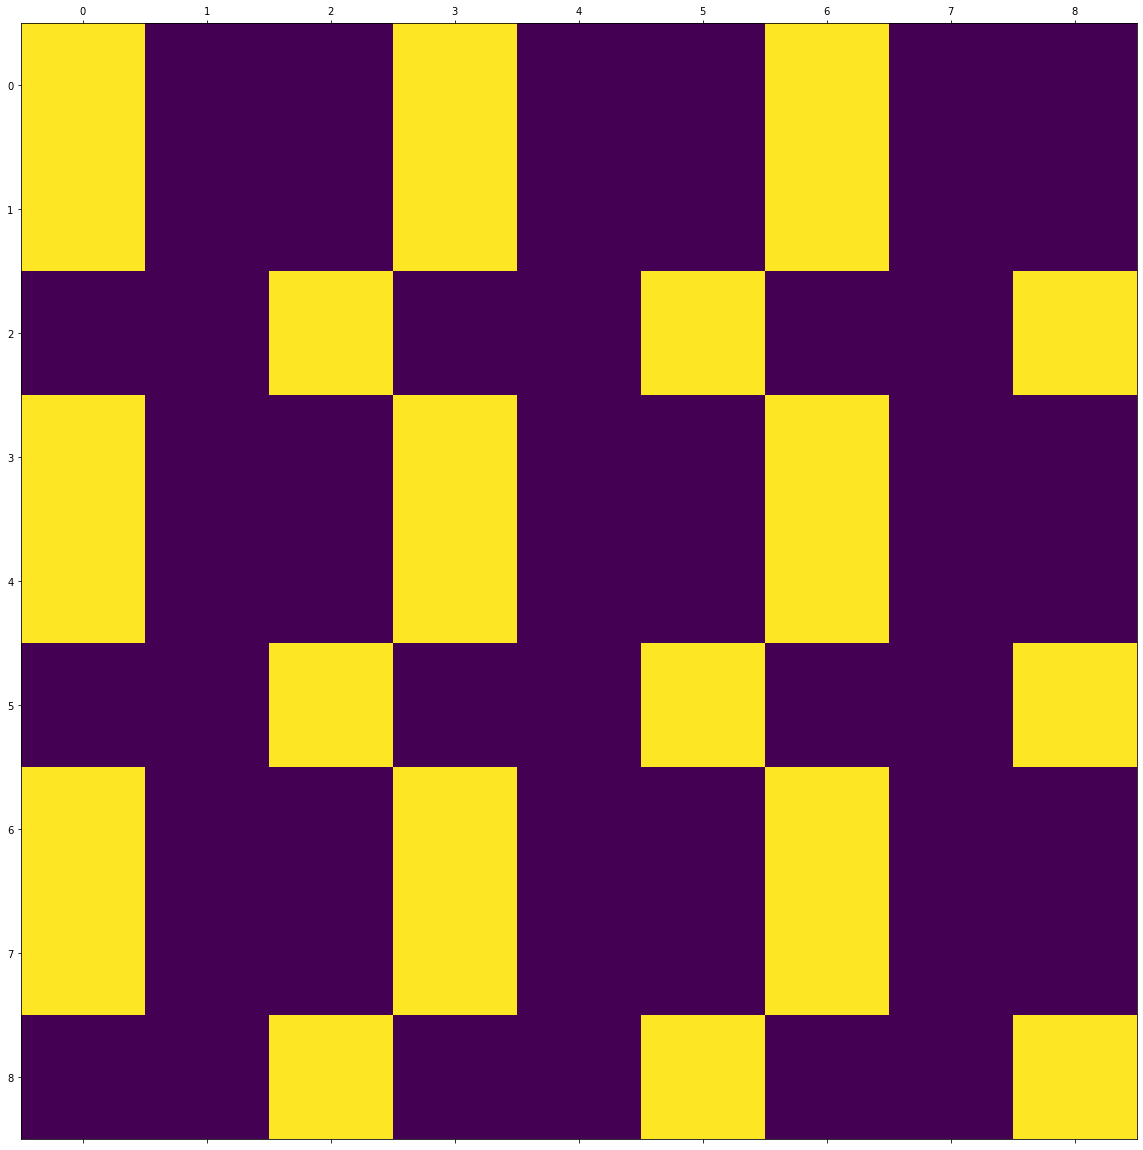

In [3]:
dot_matrix=[]
for i in range(0, len(seq1)):
  v=[];
  for j in range(0, len(seq2)):
    if (seq1[i] == seq2[j]):
      v.append(1);
    else:
      v.append(0);
  dot_matrix.append(v);

plt.figure(figsize=(40,20))
plt.matshow(dot_matrix, fignum=1)

#for i in range(0, len(seq1)):
#  for j in range(0, len(seq2)):
#    sys.stdout.write("%d " % dot_matrix[i][j])
#  sys.stdout.write("\n")


# Refinando a Matriz de Pontos

Nesta seção, vamos **refinar** nossa matriz ou filtrá-la para remover um pouco do ruído. A abordagem que usaremos é a abordagem da janela deslizante. Aqui definiremos uma janela de 6 aminoácidos, por exemplo. Para cada aminoácido *i* na sequência seq1, analisaremos [i, i+1, i+2, i+3, i+4 e i+5]. Compararemos estes 6 aminoácidos com os aminoácidos *j* na sequência seq2 dentro de uma janela de 6 aminoácidos também: [j, j+1, j+2, j+3, j+4 e j+5]. 

Na comparação de (i+k) com (j+k) com *k* que vai de 0 a 5, tivermos pelo menos 3 aminoácidos em comum entre seq1 e seq2, colocamos um 1 na posição i,j da matriz de pontos. 

Neste caso, o número mínimo de posições coincidentes é a *strigency* no nosso código.

[[1, 0, 0, 1, 0, 0, 1], [0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 1, 0, 0, 1], [0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 1, 0, 0, 1]]


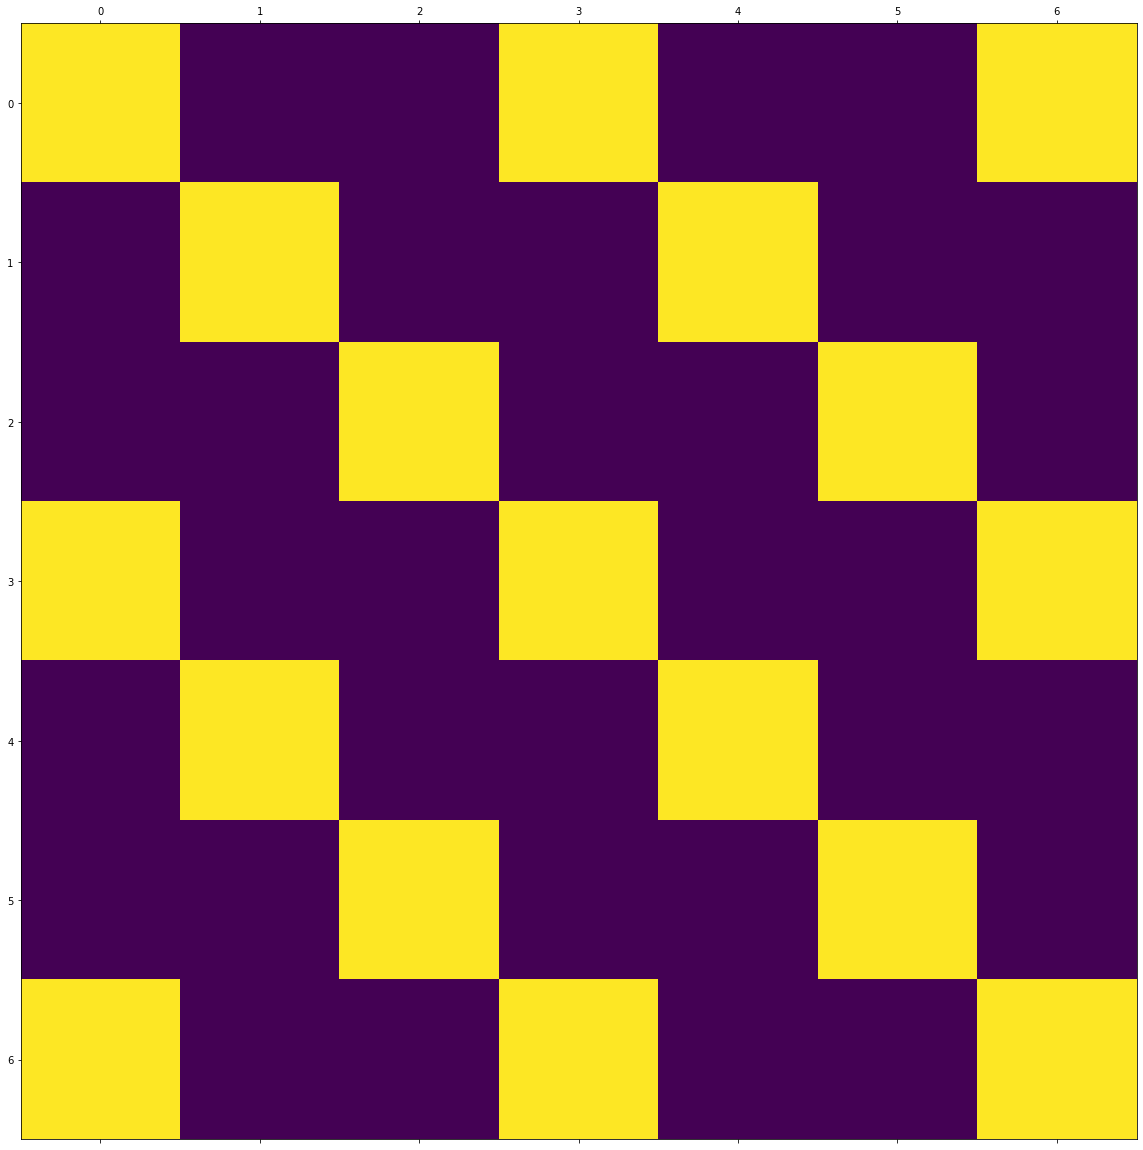

In [9]:
dot_matrix=[]

window=3;
stringency=2;


for i in range(0, len(seq1)-window+1):
  v=[];
  for j in range(0, len(seq2)-window+1):
    count=0
    for k in range(0,window):
      if (seq1[i+k] == seq2[j+k]):
        count = count+1;
    if (count >= stringency):
      v.append(1);
    else:
      v.append(0);
  dot_matrix.append(v);


plt.figure(figsize=(40,20))
plt.matshow(dot_matrix, fignum=1)

print(dot_matrix)